In [23]:
import tifffile as tiff
import matplotlib.pyplot as plt
from subprocess import check_output

In [20]:
from abakit.lib.utilities_registration import register_simple


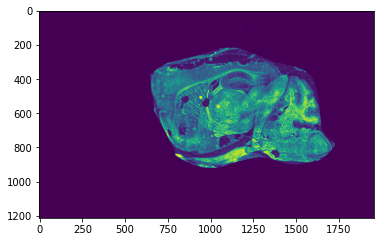

In [13]:
file = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/CH1/thumbnail_cleaned/134.tif'
image = tiff.imread(file)
plt.imshow(image[:,:])
# tiff.imsave(file,image[:,:,0])

In [22]:
import numpy as np
import os

In [15]:
from scipy.ndimage import affine_transform
T = np.array([[ 9.96025927e-01,  9.64719597e-02, -1.04249959e+03],
       [-9.64719597e-02,  9.96025927e-01, -9.34188294e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [16]:
image = tiff.imread(file)
matrix = T[:2,:2]
offset = T[:2,2]
offset = np.flip(offset)
image1 = affine_transform(image,matrix.T,offset)

In [21]:
fixed_index = 133
moving_index = 134
INPUT = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/CH1/thumbnail_cleaned/'

In [24]:
def parameters_to_rigid_transform(rotation, xshift, yshift, center):
    rotation, xshift, yshift = np.array([rotation, xshift, yshift]).astype(np.float16)
    center = np.array(center).astype(np.float16)
    R = np.array([[np.cos(rotation), -np.sin(rotation)],
                    [np.sin(rotation), np.cos(rotation)]])
    shift = center + (xshift, yshift) - np.dot(R, center)
    T = np.vstack([np.column_stack([R, shift]), [0, 0, 1]])
    return T

In [25]:
def get_rotation_center(INPUT):
    files = sorted(os.listdir(INPUT))
    midpoint = len(files) // 2
    midfilepath = os.path.join(INPUT, files[midpoint])
    width,height = get_image_size(midfilepath)
    center = np.array([width, height]) / 2
    return center

In [26]:
def get_image_size(filepath):
    result_parts = str(check_output(["identify", filepath]))
    results = result_parts.split()
    width, height = results[2].split('x')
    return int(width), int(height)

In [27]:
second_transform_parameters,initial_transform_parameters = \
    register_simple(INPUT, fixed_index, moving_index,False)
T1 = parameters_to_rigid_transform(*initial_transform_parameters)
T2 = parameters_to_rigid_transform(*second_transform_parameters, get_rotation_center(INPUT))
T = T1@T2    

In [41]:
initial_transform_parameters

(0.0, 0.0, 0.0, (978.5, 605.5))

In [43]:
def parameters_to_rigid_transform(rotation, xshift, yshift, center):
    print((rotation, xshift, yshift, center))
    rotation, xshift, yshift = np.array([rotation, xshift, yshift]).astype(np.float16)
    center = np.array(center).astype(np.float16)
    R = np.array([[np.cos(rotation), -np.sin(rotation)],
                    [np.sin(rotation), np.cos(rotation)]])
    shift = center + (xshift, yshift) - np.dot(R, center)
    T = np.vstack([np.column_stack([R, shift]), [0, 0, 1]])
    return T

In [45]:
T1 = parameters_to_rigid_transform(*initial_transform_parameters)

(0.0, 0.0, 0.0, (978.5, 605.5))


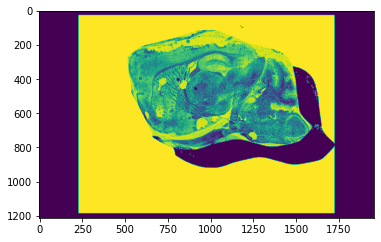

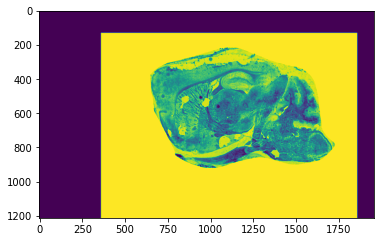

In [50]:
imagef = tiff.imread(file)
imagem = tiff.imread(INPUT+'133.tif')
T = np.linalg.inv(T)
matrix = T[:2,:2]
offset = T[:2,2]
offset = np.flip(offset)
imagemvd = affine_transform(imagem,matrix.T,offset)
plt.figure()
plt.imshow(imagef-imagem)
plt.figure()
plt.imshow(imagef-imagemvd)

In [52]:
np.linalg.inv(T)

array([[ 1.00000000e+00, -4.17232513e-07,  1.32000000e+02],
       [ 4.17232513e-07,  1.00000000e+00,  1.04000000e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [53]:
T

array([[ 1.00000000e+00,  4.17232513e-07, -1.32000043e+02],
       [-4.17232513e-07,  1.00000000e+00, -1.03999945e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [46]:
import SimpleITK as sitk
pixelType = sitk.sitkFloat32
fixed_file = os.path.join(INPUT, f'{fixed_index}.tif')
moving_file = os.path.join(INPUT, f'{moving_index}.tif')
fixed = sitk.ReadImage(fixed_file, pixelType)
moving = sitk.ReadImage(moving_file, pixelType)
initial_transform = sitk.CenteredTransformInitializer(fixed, 
                                                    moving, 
                                                    sitk.Euler2DTransform(), 
                                                    sitk.CenteredTransformInitializerFilter.GEOMETRY)

In [47]:
print(initial_transform)

itk::simple::Transform
 Euler2DTransform (0x2239940)
   RTTI typeinfo:   itk::Euler2DTransform<double>
   Reference Count: 1
   Modified Time: 134079
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 -0 
     0 1 
   Offset: [0, 0]
   Center: [978.5, 605.5]
   Translation: [0, 0]
   Inverse: 
     1 0 
     0 1 
   Singular: 0
   Angle       = 0



In [77]:
import SimpleITK as sitk
pixelType = sitk.sitkFloat32
fixed_file = os.path.join(INPUT, f'{195}.tif')
moving_file = os.path.join(INPUT, f'{196}.tif')
fixed = sitk.ReadImage(fixed_file, pixelType)
moving = sitk.ReadImage(moving_file, pixelType)
T = np.array([[ 9.98265085e-01, -7.12396912e-02,  2.64204136e+02],
       [ 7.12396912e-02,  9.98265085e-01, -7.46407754e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

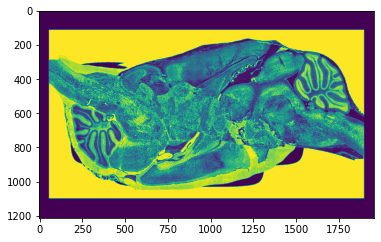

In [81]:
imagef = tiff.imread(fixed_file)
imagem = tiff.imread(moving_file)
plt.figure()
plt.imshow(imagef-imagem)

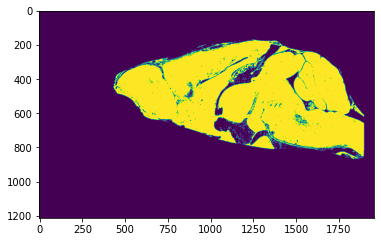

In [83]:
plt.imshow(imagef>np.mean(imagef))

In [84]:
import cv2

In [242]:

def find_principle_vector(mask):
    moments = cv2.moments(mask)
    x = moments['m10']/moments['m00']
    y = moments['m01']/moments['m00']
    u20 = moments['m20']/moments['m00'] - x**2
    u11 = moments['m11']/moments['m00'] - x*y
    u02 = moments['m02']/moments['m00'] - y**2
    cov = np.array([[u20,u11],[u11,u02]])
    eval,evec = np.linalg.eig(cov)
    principle_vec = evec[np.argmax(eval)]
    x = moments['m10']/moments['m00']
    y = moments['m01']/moments['m00']
    center = np.array([x,y]).astype(int)
    return principle_vec,center

# def find_principle_vector(mask):
#     moments = cv2.moments(mask)
#     x = moments['m10']/moments['m00']
#     y = moments['m01']/moments['m00']
#     u20 = moments['m20']/moments['m00'] - x**2
#     u11 = moments['m11']/moments['m00'] - x*y
#     u02 = moments['m02']/moments['m00'] - y**2
#     theta = 0.5*np.arctan(2*u11/(u20-u02))
#     x = moments['m10']/moments['m00']
#     y = moments['m01']/moments['m00']
#     center = np.array([x,y]).astype(int)
#     return (np.cos(theta),np.sin(theta)),center

def plot_mask_with_principle_vector(principle_vec,center,mask):
    x = np.linspace(center[0],center[0]+500,100)
    slope = principle_vec[1]/principle_vec[0]
    y = slope*x+center[1]-center[0]*slope
    plt.imshow(mask)
    plt.plot(x,y,color = 'r')
    plt.scatter(x[-1],y[-1],color = 'r')

In [243]:
def test_image(image):
    mask = np.array((image>np.mean(image)*0.5)*255).astype('uint8')
    principle_vec,center = find_principle_vector(mask)
    print(principle_vec)
    plot_mask_with_principle_vector(principle_vec,center,mask)
    return principle_vec

[ 0.98858102 -0.1506903 ]


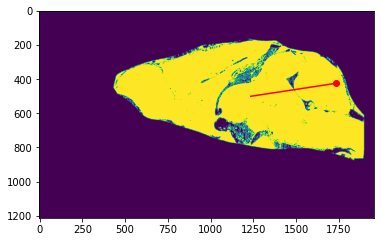

In [244]:
principle_vec = test_image(imagef)

[ 0.97194741 -0.23519828]


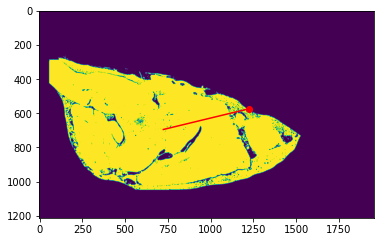

In [245]:
principle_vec2 = test_image(imagem)

[ 0.52647769 -0.85018894]


array([ 0.52647769, -0.85018894])

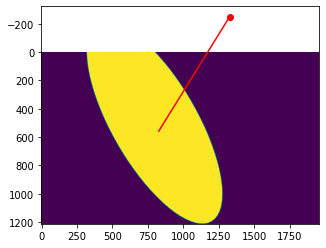

In [246]:
mask = np.array((image<0)*255).astype('uint8')
cv2.ellipse(mask,(800,500),(800,300),60,0,360,255,-1)
test_image(mask)

In [247]:
eclipse.shape

(1212, 1958)